In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("drinks.csv")
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,afghanistan,0,0,0,0.0
1,albania,89,132,54,4.9
2,algeria,25,0,14,0.7
3,andorra,245,138,312,12.4
4,angola,217,57,45,5.9
...,...,...,...,...,...
188,venezuela,333,100,3,7.7
189,vietnam,111,2,1,2.0
190,yemen,6,0,0,0.1
191,zambia,32,19,4,2.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.7+ KB


In [4]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,afghanistan,0,0,0,0.0
1,albania,89,132,54,4.9
2,algeria,25,0,14,0.7
3,andorra,245,138,312,12.4
4,angola,217,57,45,5.9


In [5]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [6]:
df[ ["beer_servings", "wine_servings"] ]

,beer_servings,wine_servings
0,0,0
1,89,54
2,25,14
3,245,312
4,217,45
...,...,...
188,333,3
189,111,1
190,6,0
191,32,4


In [7]:
corr = df[ ["beer_servings", "wine_servings"] ].corr(method="pearson")
corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [14]:
corr2 = df[ ["beer_servings", "wine_servings", "spirit_servings", "total_litres_of_pure_alcohol"] ].corr(method="pearson")
corr2

,beer_servings,wine_servings,spirit_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.527172,0.458819,0.835839
wine_servings,0.527172,1.000000,0.194797,0.667598
spirit_servings,0.458819,0.194797,1.000000,0.654968
total_litres_of_pure_alcohol,0.835839,0.667598,0.654968,1.000000


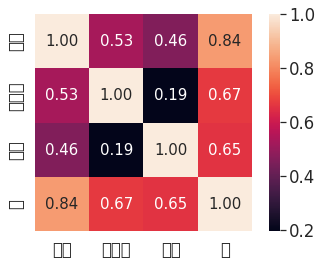

In [18]:
cols = ["맥주", "증류주", "와인", "술"]

sns.set(font_scale=1.5)
hm = sns.heatmap(corr2.values,
                cbar=True, annot=True, square=True,
                fmt=".2f",
                annot_kws={"size":15},
                 xticklabels=cols,
                 yticklabels=cols
                )
plt.show()

In [19]:
!sudo pip install pycountry-convert

Looking in indexes: http://repo.ai.gato/registry/repository/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 103.5 MB/s eta 0:00:00 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 166.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 74.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.3/209.3 kB 10.6 MB/s eta 0:00:00
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=6175e79938c6181359db428d320fb3a85ea55db44dd04b615a38801cbf703922
  Stored in directory: /tmp/pip-ephem-wheel-cache-7prqflh0/wheels/62/af/8a/44b191fcbca7f393a170cc559f522cfd178677ae81482853fd
Successfully built pycountry


In [21]:
import pycountry_convert as pc

In [23]:
pc.country_name_to_country_alpha2("South Korea")

'KR'

In [25]:
pc.country_alpha2_to_continent_code("IT")

'EU'

In [26]:
df[["country"]]

,country
0,afghanistan
1,albania
2,algeria
3,andorra
4,angola
...,...
188,venezuela
189,vietnam
190,yemen
191,zambia


In [29]:
def convert(name):
    try:
        return pc.country_alpha2_to_continent_code(
            pc.country_name_to_country_alpha2(name.capitalize())
        )
    except:
        return None

In [30]:
df["country"].apply(convert)

0      AS
1      EU
2      AF
3      EU
4      AF
       ..
188    SA
189    AS
190    AS
191    AF
192    AF
Name: country, Length: 193, dtype: object

In [31]:
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,afghanistan,0,0,0,0.0
1,albania,89,132,54,4.9
2,algeria,25,0,14,0.7
3,andorra,245,138,312,12.4
4,angola,217,57,45,5.9
...,...,...,...,...,...
188,venezuela,333,100,3,7.7
189,vietnam,111,2,1,2.0
190,yemen,6,0,0,0.1
191,zambia,32,19,4,2.5


In [32]:
df["continent"] = df["country"].apply(convert)
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,afghanistan,0,0,0,0.0,AS
1,albania,89,132,54,4.9,EU
2,algeria,25,0,14,0.7,AF
3,andorra,245,138,312,12.4,EU
4,angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,venezuela,333,100,3,7.7,SA
189,vietnam,111,2,1,2.0,AS
190,yemen,6,0,0,0.1,AS
191,zambia,32,19,4,2.5,AF


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     158 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [34]:
df["continent"] = df["continent"].fillna("OT")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [35]:
df["continent"].value_counts()

AF    43
AS    41
EU    37
OT    35
NA    14
SA    12
OC    11
Name: continent, dtype: int64

In [38]:
labels = df["continent"].value_counts().index

In [39]:
counts = df["continent"].value_counts().values

In [40]:
explode = (0 , 0 , 0, 0.25, 0, 0, 0)

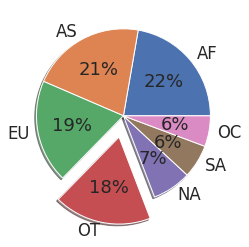

In [41]:
plt.pie(
    counts,
    explode=explode,
    labels=labels,
    autopct="%0.0f%%",
    shadow=True
)
plt.show()

In [42]:
df.groupby("continent")["spirit_servings"].agg([
    "mean", "min", "max", "sum", "std"
])

,mean,min,max,sum,std
continent,,,,,
AF,15.093023,0,152,649,28.466199
AS,62.658537,0,258,2569,77.492777
EU,135.594595,0,373,5017,80.401928
NA,166.142857,68,438,2326,108.896463
OC,50.181818,0,200,552,53.947786
OT,89.771429,0,326,3142,94.206309
SA,114.750000,25,302,1377,77.077440


In [43]:
df.groupby("continent")["total_litres_of_pure_alcohol"].agg([
    "mean", "min", "max", "sum", "std"
])

,mean,min,max,sum,std
continent,,,,,
AF,2.688372,0.0,9.1,115.6,2.692336
AS,2.139024,0.0,8.2,87.7,2.351689
EU,9.251351,0.0,14.4,342.3,2.840346
NA,5.785714,2.2,11.9,81.0,2.505028
OC,3.290909,0.9,10.4,36.2,3.266636
OT,4.911429,0.0,11.8,171.9,3.528187
SA,6.308333,3.8,8.3,75.7,1.531166


In [47]:
df.groupby("continent")["beer_servings"].mean().idxmax()

'EU'